# Final Project Report

* Class: DS 5100
* Student Name: Jasmine Waller
* Student Net ID: vwx5pn 
* This URL:https://github.com/jwall-uva/ds5100_project/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/jwall-uva/ds5100_project/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [12]:
'''
import numpy as np
import pandas as pd

class Die(): 
    
    '''This class takes a die of N number of sides. Each side is initially evenly weighted but 
        you can change the weight of the sides. This class also has functions that will roll the die 
        and show the results as well.'''
    
    def __init__(self, face): 
        "Intializes a numpy as the faces of the die."
    #takes numpy as an argument and has an error if not 
        if not isinstance(face, np.ndarray):
            raise TypeError("Input must be a NumPy array.")
            
    #raises a ValueError if the faces are not distinct     
        if len(np.unique(face)) != len(face): 
            raise ValueError("All face values must be distinct.")
    
        weights = np.ones(len(face), dtype = float)
        
        # Save to a private DataFrame with faces as index
        self.__data = pd.DataFrame({'weight': weights}, index=face)
        
    def change_weight(self, face, new_weight):
        "A method to change the weight of a single side."
     # Check if face exists in the index
        if face not in self.__data.index:
            raise IndexError(f"Face '{face}' not found in die faces.")   
            
        try: 
            numeric_weight = float(new_weight) 
        except (TypeError, ValueError):
            raise TypeError("New weight must be a number or castable to a number.")
        
        # Assign the new weight
        self.__data.loc[face, 'weight'] = numeric_weight
        
    def roll_die(self, num_rolls=1):
        "A method to roll the die one or more times."
        # Validate num_rolls is a positive integer
        if not isinstance(num_rolls, int) or num_rolls < 1:
            raise ValueError("Number of rolls must be a positive integer.")
        
        # get the faces and weights 
        faces = self.__data.index.to_numpy()
        weights = self.__data['weight'].to_numpy()
        
        # Normalize weights to convert them into probabilities
        probabilities = weights / weights.sum()

        # Use numpy to randomly choose faces based on weights
        rolls = np.random.choice(faces, size=num_rolls, p=probabilities)
        
        return rolls.tolist()

    def show_die(self):
        "A method to show the die’s current state."
        # Returns a copy of the private die data frame.
        return self.__data.copy()
    
        
import numpy as np 
import pandas as pd 

class Game():
    
    """The class takes multiple die in a list. From there, you can roll the die all together to play.
    You can also print out the game results in a data frame."""
    
    def __init__(self, dice_list):
        
        self.dice_list = dice_list
        self.__results = None 
        
    def play(self, num_rolls):
        
        if not isinstance(num_rolls, int) or num_rolls<1:
            raise ValueError("Number of rolls must be a positive integer.")
            
        results = {}
            
        for i, die in enumerate(self.dice_list):
                results[i] = die.roll_die(num_rolls)
                
        self.__results = pd.DataFrame(results) 
        self.__results.index.name = 'roll'
        self.__results.index += 1
        
    def game_results(self, form='wide'): 
        "A method to show the user the results of the most recent play."
        if self.__results is None:
            return None 
        
        if form == 'wide':
            return self.__results.copy()
        elif form == 'narrow':
            stacked = self.__results.stack()
            df = stacked.to_frame(name = 'result') 
            df = df.rename_axis(['roll', 'die'])
            df = df.reset_index()
            df = df.set_index(['roll', 'die'])
            return df 
                              
        else:
            raise ValueError("Invalid. Choose narrow or wide.")

import pandas as pd
from collections import Counter

class Analyzer():
    '''An Analyzer object takes the results of a single game and computes various descriptive 
    statistical properties about it.'''


    def __init__(self, game):
        "Takes a game object as its input parameter and gives an error if not a game object"
        if not isinstance(game, Game):
            raise ValueError("Error. Expected a Game object.")
        
        self.game = game 
        self.results = game.game_results()
        
            
    def jackpot(self):
        "Checks to see how many times all the faces have the same value."
        
        jackpots = self.results.nunique(axis=1) == 1 
        return jackpots.sum()
    
    def roll_count(self):
        "Counts how many times a given face is rolled in each event."
    
        face_counts = self.results.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)
        face_counts.index.name = 'roll' 
        face_counts.columns.name = 'face' 
        return face_counts
        
    def combo_count(self):
        
        combos = self.results.apply(lambda row: tuple(sorted(row)), axis=1)
        combo_counts = combos.value_counts().to_frame(name='count')
        combo_counts.index.name = 'combination'
        return combo_counts
    
    def permutation_count(self):
        
        permutations = self.results.apply(lambda row: tuple(row), axis=1)
        perm_counts = permutations.value_counts().to_frame(name='count')
        perm_counts.index.name = 'permutation'
        return perm_counts'''

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 114)

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
'''import unittest
import numpy as np
import pandas as pd
from Projectclasses import Die, Game, Analyzer 


class TestDieStructures(unittest.TestCase):

    def setUp(self):
        self.faces = np.array(['A', 'B', 'C'])
        self.die = Die(self.faces)

    def test_init_creates_dataframe(self):
        result = self.die.show_die()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertListEqual(result.columns.tolist(), ['weight'])
        self.assertTrue(all(face in result.index for face in self.faces))

    def test_change_weight_modifies_dataframe(self):
        original = self.die.show_die()
        self.die.change_weight('B', 4.5)
        modified = self.die.show_die()
        self.assertNotEqual(original.loc['B', 'weight'], modified.loc['B', 'weight'])
        self.assertIsInstance(modified, pd.DataFrame)

    def test_roll_die_returns_list(self):
        rolls = self.die.roll_die(5)
        self.assertIsInstance(rolls, list)
        self.assertEqual(len(rolls), 5)
        for roll in rolls:
            self.assertIn(roll, self.faces)

    def test_show_die_returns_dataframe_copy(self):
        df1 = self.die.show_die()
        df2 = self.die.show_die()
        self.assertIsInstance(df1, pd.DataFrame)
        self.assertIsInstance(df2, pd.DataFrame)
        self.assertFalse(df1 is df2)  # Ensures it's a copy, not a reference 

class TestGameStructures(unittest.TestCase):

    def setUp(self):
        faces = np.array(['A', 'B', 'C'])
        self.die1 = Die(faces)
        self.die2 = Die(faces)
        self.game = Game([self.die1, self.die2])
        self.num_rolls = 5

    def test_play_creates_dataframe(self):
        self.game.play(self.num_rolls)
        result = self.game.game_results('wide')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape, (self.num_rolls, 2))  # 2 dice
        self.assertListEqual(list(result.columns), [0, 1])  # Die indices

    def test_game_results_wide_structure(self):
        self.game.play(self.num_rolls)
        df_wide = self.game.game_results('wide')
        self.assertIsInstance(df_wide, pd.DataFrame)
        self.assertEqual(df_wide.index.name, 'roll')

    def test_game_results_narrow_structure(self):
        self.game.play(self.num_rolls)
        df_narrow = self.game.game_results('narrow')
        self.assertIsInstance(df_narrow, pd.DataFrame)
        self.assertEqual(df_narrow.index.names, ['roll', 'die'])
        self.assertListEqual(df_narrow.columns.tolist(), ['result'])

    def test_game_results_none_before_play(self):
        new_game = Game([self.die1])
        self.assertIsNone(new_game.game_results())

    def test_game_results_invalid_format_raises(self):
        self.game.play(self.num_rolls)
        with self.assertRaises(ValueError):
            self.game.game_results('long')  # Invalid format

    def test_play_invalid_rolls_raises(self):
        with self.assertRaises(ValueError):
            self.game.play(0)
        with self.assertRaises(ValueError):
            self.game.play(-5)
        with self.assertRaises(ValueError):
            self.game.play("five") 

class TestAnalyzerStructures(unittest.TestCase):

    def setUp(self):
        # Create a game with two dice and play it
        faces = np.array(['A', 'B', 'C'])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_jackpot_returns_int(self):
        result = self.analyzer.jackpot()
        self.assertTrue(isinstance(result, (int, np.integer)))

    def test_roll_count_returns_dataframe(self):
        result = self.analyzer.roll_count()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertTrue(result.index.name == 'roll')
        self.assertTrue(result.columns.name == 'face')

    def test_combo_count_returns_dataframe(self):
        result = self.analyzer.combo_count()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertIn('count', result.columns)
        self.assertEqual(result.index.name, 'combination')

    def test_permutation_count_returns_dataframe(self):
        result = self.analyzer.permutation_count()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertIn('count', result.columns)
        self.assertEqual(result.index.name, 'permutation')

    def test_init_invalid_game_raises(self):
        with self.assertRaises(ValueError):
            Analyzer("not a game")

if __name__ == '__main__':
    unittest.main()
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [ ]:
import sys
sys.path.append('/sfs/gpfs/tardis/home/vwx5pn/ds5100_project')  # Adjust this to your actual path

from Projectclasses import Die, Game, Analyzer


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [ ]:
help(Die)
help(Game)
help(Analyzer)

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/jwall-uva/ds5100_project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [13]:
import numpy as np
from Projectclasses import Die

In [14]:
fair_coin = Die(np.array(['H', 'T']))

unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5.0)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [15]:
import numpy as np
from Projectclasses import Die, Game

fair_coin1 = Die(np.array(['H', 'T']))
fair_coin2 = Die(np.array(['H', 'T']))

In [16]:
game = Game([fair_coin1, fair_coin2])
game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [17]:
coin1 = Die(np.array(['H', 'T']))
coin2 = Die(np.array(['H', 'T']))


coin1.change_weight('H', 5.0)
new_game = Game([coin1, coin1, coin2])
new_game.play(1000)
print(new_game.game_results('wide'))

      0  1  2
roll         
1     H  T  H
2     H  H  T
3     H  H  H
4     H  H  T
5     H  H  H
...  .. .. ..
996   T  H  T
997   T  H  H
998   T  H  H
999   H  H  H
1000  H  H  H

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [18]:
from Projectclasses import Analyzer

analyzer_game = Analyzer(game)
analyzer_new_game = Analyzer(new_game)

jackpot_game = analyzer_game.jackpot()
jackpot_new_game = analyzer_new_game.jackpot()

In [19]:
print("Task 1 Jackpot Count:", jackpot_game)
print("Task 2 Jackpot Count:", jackpot_new_game)

Task 1 Jackpot Count: 502
Task 2 Jackpot Count: 385


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [20]:
total_rolls = 1000

rel_freq1 = jackpot_game / total_rolls
rel_freq2 = jackpot_new_game / total_rolls

print("Task 1 Relative Frequency:", rel_freq1)
print("Task 2 Relative Frequency:", rel_freq2)

Task 1 Relative Frequency: 0.502
Task 2 Relative Frequency: 0.385


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

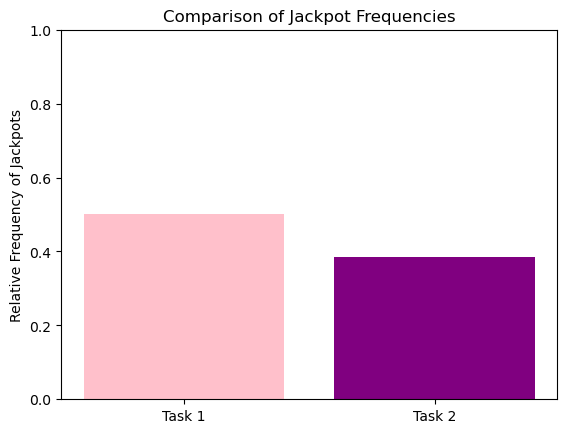

In [21]:
import matplotlib.pyplot as plt


labels = ['Task 1', 'Task 2']
values = [rel_freq1, rel_freq2]

# Plot
plt.bar(labels, values, color=['pink', 'purple'])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.ylim(0, 1) 


plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [22]:
die1 = Die(np.array(['1', '2', '3', '4', '5', '6']))
die2 = Die(np.array(['1', '2', '3', '4', '5', '6']))
die3 = Die(np.array(['1', '2', '3', '4', '5', '6']))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [23]:
die1.change_weight('6', 5.0)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [24]:
die2.change_weight('1', 5.0)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [25]:
Dice_game = Game([die3, die3, die3, die3, die3])
Dice_game.play(10000)
print(Dice_game.game_results('wide'))

       0  1  2  3  4
roll                
1      4  5  4  3  1
2      3  6  1  2  2
3      3  4  5  1  3
4      1  6  4  2  5
5      2  6  4  1  1
...   .. .. .. .. ..
9996   6  1  6  2  1
9997   1  4  2  5  1
9998   4  2  5  4  5
9999   1  4  2  3  3
10000  4  3  6  5  1

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [26]:
Vegas_game = Game([die1, die2, die3, die3, die3])
Vegas_game.play(10000)
print(Vegas_game.game_results('wide'))

       0  1  2  3  4
roll                
1      6  1  4  1  6
2      3  1  5  1  5
3      5  6  5  5  2
4      2  1  6  4  2
5      1  1  3  3  4
...   .. .. .. .. ..
9996   1  1  5  1  1
9997   6  1  5  1  5
9998   6  1  5  4  6
9999   6  1  4  4  4
10000  3  1  6  3  1

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [27]:
from Projectclasses import Analyzer

analyzer_Dice_game = Analyzer(Dice_game)
analyzer_Vegas_game = Analyzer(Vegas_game)

jackpot_Dice_game = analyzer_Dice_game.jackpot()
jackpot_Vegas_game = analyzer_Vegas_game.jackpot()

print("Task 1 Jackpot Count:", jackpot_game)
print("Task 2 Jackpot Count:", jackpot_new_game)

Task 1 Jackpot Count: 502
Task 2 Jackpot Count: 385


In [28]:
total_games = 10000

rel_freqa = jackpot_Dice_game / total_games
rel_freqb = jackpot_Vegas_game / total_games

print("Task 1 Relative Frequency:", rel_freqa)
print("Task 2 Relative Frequency:", rel_freqb)

Task 1 Relative Frequency: 0.0009
Task 2 Relative Frequency: 0.0011


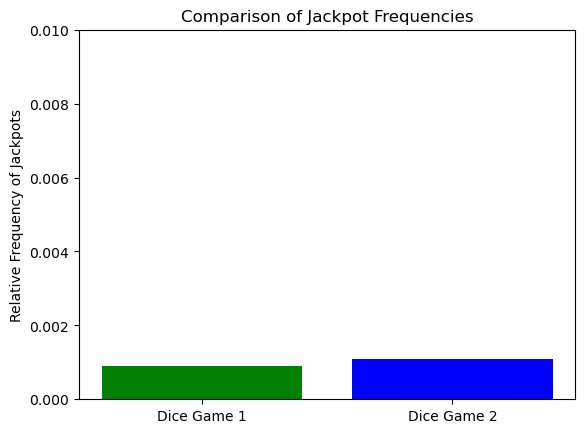

In [29]:
import matplotlib.pyplot as plt


labels = ['Dice Game 1', 'Dice Game 2']
values = [rel_freqa, rel_freqb]

# Plot
plt.bar(labels, values, color=['green', 'blue'])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.ylim(0, 0.01) 


plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [30]:
import pandas as pd
import numpy as np
from Projectclasses import Die

df = pd.read_csv('/sfs/gpfs/tardis/home/vwx5pn/ds5100_project/english_letters.txt', header=None, names=['letter', 'frequency'])


faces = df['letter'].tolist()
die = Die(np.array(faces))


for index, row in df.iterrows():
    die.change_weight(row['letter'], row['frequency'])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [31]:
letter_game = Game([die, die, die, die, die])
letter_game.play(1000)
print(letter_game.game_results('wide'))

ValueError: probabilities contain NaN

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [32]:
# Check if any weights are zero or NaN before normalizing
weights = df['frequency'].values
weights = np.nan_to_num(weights)  # Convert NaNs to 0s if there are any NaN values

# Ensure no zero values in the weights
if np.any(weights == 0):
    print("Warning: Some frequencies are zero. This might affect the randomness of the roll.")

# Normalize the weights
probabilities = weights / weights.sum()

# Check if any NaN values remain after normalization
if np.any(np.isnan(probabilities)):
    print("Warning: NaN values found in probabilities.")

/tmp/ipykernel_582058/4256674890.py:10: RuntimeWarning: invalid value encountered in divide
  probabilities = weights / weights.sum()


In [33]:

import itertools

# Step 1: Read scrabble words
with open('/sfs/gpfs/tardis/home/vwx5pn/ds5100_project/scrabble_words.txt') as file:
    valid_words = set(word.strip().lower() for word in file.readlines())

# Step 2: Generate permutations from the letters rolled
rolled_letters = ['a', 'b', 'c', 'd', 'e']  # Example letters, replace with actual dice results
permutations = set(itertools.permutations(rolled_letters))  # Generate unique permutations

# Step 3: Check if permutations are valid words
valid_word_count = 0
for perm in permutations:
    word = ''.join(perm)
    if word in valid_words:
        valid_word_count += 1

# Step 4: Calculate the difference (total permutations - valid words)
total_permutations = len(permutations)
invalid_word_count = total_permutations - valid_word_count

print(f"Total permutations: {total_permutations}")
print(f"Valid English words: {valid_word_count}")
print(f"Invalid words (not in vocabulary): {invalid_word_count}")


Total permutations: 120
Valid English words: 0
Invalid words (not in vocabulary): 120


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).